In [5]:
from keras.datasets import reuters

(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000)

2072576/2110848 [============================>.] - ETA: 0s 

In [6]:
x_train.shape

(8982,)

In [7]:
x_train

array([ [1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12],
       [1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12],
       [1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110, 59, 89, 90, 67,

In [9]:
y_train.shape

(8982,)

In [10]:
y_train

array([ 3,  4,  3, ..., 25,  3, 25])

In [15]:
len(np.unique(y_train))

46

In [12]:
import numpy as np

def one_hot_encode_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [13]:
x_train = one_hot_encode_sequences(x_train)
x_test = one_hot_encode_sequences(x_test)

In [24]:
x_train.shape

(8982, 10000)

In [17]:
import numpy as np

def one_hot_encode_labels(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [18]:
y_train = one_hot_encode_labels(y_train)
y_test = one_hot_encode_labels(y_test)

In [19]:
y_train.shape

(8982, 46)

In [21]:
y_train[0]

array([ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [32]:
split_at = 1000

x_val = x_train[:split_at]
y_val = y_train[:split_at]

partial_x_train = x_train[split_at:]
partial_y_train = y_train[split_at:]

In [29]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Dense(64, input_shape=(x_train.shape[-1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 64)                640064    
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_9 (Dense)              (None, 46)                2990      
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


In [31]:
from keras import optimizers
from keras import losses
from keras import metrics

model.compile(optimizers.RMSprop(lr=0.001), 
              losses.categorical_crossentropy, 
              [metrics.categorical_accuracy])

In [33]:
history = model.fit(partial_x_train, 
                    partial_y_train, 
                    batch_size=512, 
                    epochs=20, 
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s - loss: 2.3709 - categorical_accuracy: 0.5501 - val_loss: 1.5729 - val_categorical_accuracy: 0.6500

In [34]:
history.history

{'categorical_accuracy': [0.55011275383022851,
  0.71886745131843166,
  0.78363818597805524,
  0.83400150266574213,
  0.86920571342144237,
  0.89689300983838049,
  0.91568529178731217,
  0.9307191188817513,
  0.94086694954869976,
  0.9478827357531131,
  0.95026309282311938,
  0.95364570380213032,
  0.95251816596282335,
  0.95477324076028613,
  0.95352042034974049,
  0.95690303111966468,
  0.95828113332484133,
  0.95539964880748551,
  0.95652718557148941,
  0.95602605910983429],
 'loss': [2.3708614605287357,
  1.3099152072872084,
  0.99143470646414478,
  0.77441797404921286,
  0.61487898380647055,
  0.48488405016065389,
  0.38775709278898352,
  0.31131165960593143,
  0.25895926023270366,
  0.21809606354163721,
  0.18921593701561659,
  0.1663971898647455,
  0.15600207826228585,
  0.1434754585337143,
  0.13604386508151184,
  0.12412507138330517,
  0.11578756953519379,
  0.11819204877743712,
  0.1107625314796428,
  0.11002177155740696],
 'val_categorical_accuracy': [0.65000001335144042,
  

In [35]:
history.history.keys()

dict_keys(['val_loss', 'val_categorical_accuracy', 'loss', 'categorical_accuracy'])

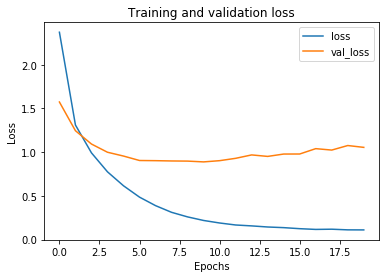

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.epoch, history.history['loss'], label='loss')
plt.plot(history.epoch, history.history['val_loss'], label='val_loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

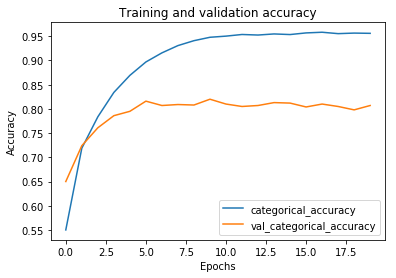

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.epoch, history.history['categorical_accuracy'], label='categorical_accuracy')
plt.plot(history.epoch, history.history['val_categorical_accuracy'], label='val_categorical_accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [40]:
optimal_num_epochs = 9

from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Dense(64, input_shape=(x_train.shape[-1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

from keras import optimizers
from keras import losses
from keras import metrics

model.compile(optimizers.RMSprop(lr=0.001), 
              losses.categorical_crossentropy, 
              [metrics.categorical_accuracy])

model.fit(partial_x_train, 
                    partial_y_train, 
                    batch_size=512, 
                    epochs=optimal_num_epochs, 
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s - loss: 2.3262 - categorical_accuracy: 0.5376 - val_loss: 1.5590 - val_categorical_accuracy: 0.6590

In [41]:
model.evaluate(x_test, y_test, batch_size=512)

2048/2246 [==========================>...] - ETA: 0s

[1.0350248186267708, 0.77960819388115288]

In [42]:
model.metrics_names

['loss', 'categorical_accuracy']

In [89]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)
y_pred

array([[  4.49585377e-06,   1.19036857e-04,   1.53436013e-05, ...,
          1.34359725e-05,   1.87904732e-06,   5.82131952e-06],
       [  5.47621923e-04,   6.16888143e-03,   7.17448071e-03, ...,
          8.25817042e-05,   1.85174827e-06,   2.28112276e-05],
       [  1.55349018e-03,   6.55476272e-01,   3.79261421e-03, ...,
          5.72692734e-05,   9.75859293e-04,   5.53681311e-05],
       ..., 
       [  4.01595753e-06,   2.24641291e-04,   2.47750431e-05, ...,
          6.33526770e-06,   3.08310700e-05,   1.21721332e-05],
       [  1.03987195e-03,   1.39513537e-01,   2.68492708e-03, ...,
          2.89294665e-04,   2.40100431e-04,   3.08046583e-04],
       [  3.40203434e-04,   6.78725839e-01,   2.48750928e-03, ...,
          1.26878076e-05,   1.02398270e-04,   2.77314903e-05]], dtype=float32)

In [90]:
y_pred = np.argmax(y_pred, axis=-1)
y_pred

array([ 3, 10,  1, ...,  3,  3,  1])

In [101]:
cm = confusion_matrix(np.argmax(y_test, axis=-1), y_pred)
cm

array([[ 7,  2,  0, ...,  0,  0,  0],
       [ 0, 85,  0, ...,  0,  0,  0],
       [ 0,  3, 11, ...,  0,  0,  0],
       ..., 
       [ 0,  0,  0, ...,  5,  0,  0],
       [ 0,  0,  0, ...,  0,  4,  0],
       [ 0,  0,  0, ...,  0,  0,  0]])

In [104]:
sum(cm.diagonal()) / len(y_test)

0.77960819234194123

In [114]:
# base line accuracy: random pred classes
import copy

y_test_copy = copy.copy(np.argmax(y_test, axis=-1))
np.random.shuffle(y_test_copy)
hits_arr = np.argmax(y_test, axis=-1) == np.array(y_test_copy)
sum(hits_arr) / len(y_test)

0.188780053428317